**Importing  Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report




In [ ]:
df=pd.read_csv("/content/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


**Basic Data Exploration**


In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [ ]:
df.shape

(32581, 12)

In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,28638.0,27.708918,6.162906,20.00,23.00,26.00,30.00,80.00
person_income,28638.0,54362.871115,19831.718077,4000.00,39480.00,55956.00,65000.00,100000.00
person_home_ownership,28638.0,1.680669,1.434497,0.00,0.00,3.00,3.00,3.00
person_emp_length,28638.0,4.779153,4.029778,0.00,2.00,4.00,7.00,38.00
loan_intent,28638.0,2.531322,1.729816,0.00,1.00,3.00,4.00,5.00
loan_grade,28638.0,1.228158,1.170746,0.00,0.00,1.00,2.00,6.00
loan_amnt,28638.0,9497.570536,5992.283803,1000.00,5000.00,8000.00,12000.00,30000.00
loan_int_rate,28638.0,11.014899,3.190992,5.42,7.90,10.99,13.47,19.91
loan_status,28638.0,0.216600,0.411935,0.00,0.00,0.00,0.00,1.00
loan_percent_income,28638.0,0.207745,0.067907,0.17,0.17,0.17,0.22,0.50


In [ ]:
df.duplicated().sum()

165

In [ ]:
df.duplicated().value_counts()

False    32416
True       165
Name: count, dtype: int64

In [ ]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [ ]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

**Data Visualisation**

<Axes: xlabel='loan_status', ylabel='count'>

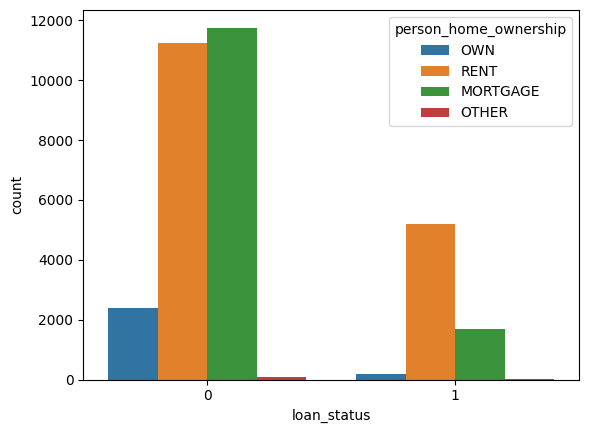

In [ ]:
sns.countplot(x="loan_status",data=df,hue='person_home_ownership')

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)


Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


In [ ]:
numerical_features = df.select_dtypes(include=[np.number]).columns
print(numerical_features)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')


<ipython-input-19-c5ab8bb9d448>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="loan_intent",data=df,palette="Set1")


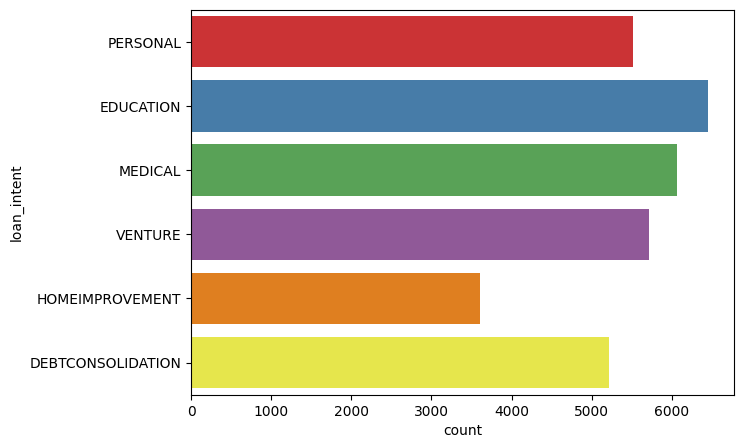

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(y="loan_intent",data=df,palette="Set1")
plt.show()

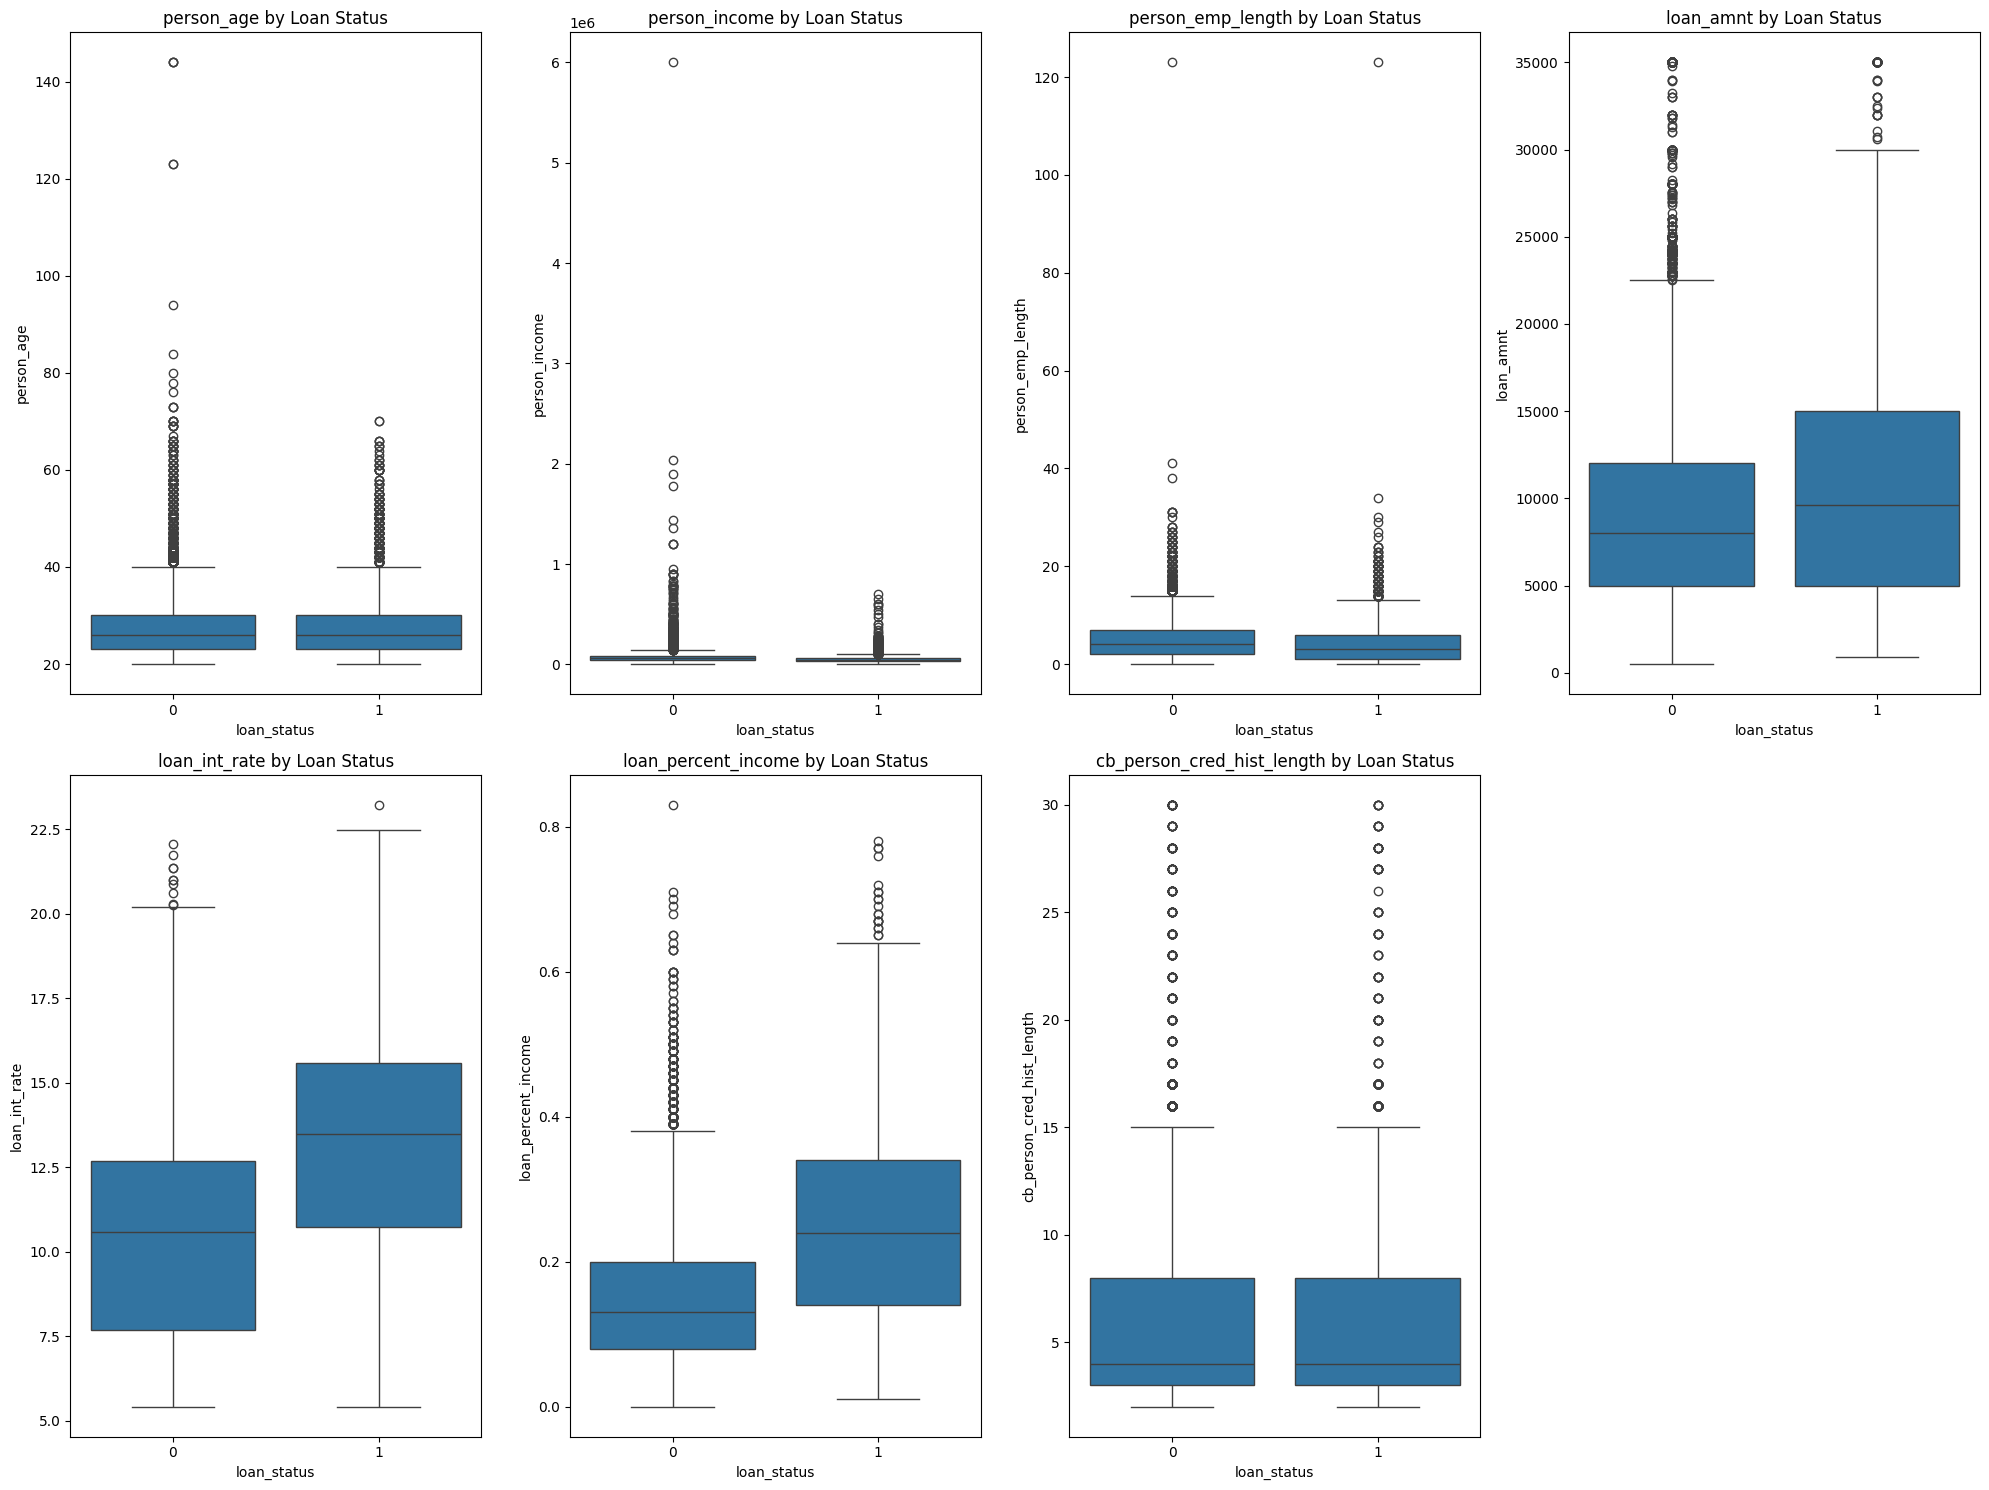

In [ ]:
numerical_col=['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length']
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_col, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f'{col} by Loan Status')
    plt.grid(False)
plt.tight_layout()
plt.show()

**Data Preprocessing**

In [ ]:
df = df.dropna(subset=['person_emp_length', 'loan_int_rate'])
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
df['person_age'].value_counts()

person_age
23     3413
22     3163
24     3130
25     2700
26     2201
27     1887
28     1624
29     1493
30     1126
21     1061
31     1008
32      860
33      758
34      625
35      559
36      482
37      409
38      321
39      270
40      236
41      218
42      165
43      142
44      116
45       91
46       86
47       76
48       65
50       45
49       41
52       33
51       33
53       26
54       21
55       18
58       17
57       15
56       14
20       14
60       13
61        8
66        8
64        7
62        6
69        5
70        5
59        5
65        5
144       3
63        3
73        2
78        1
123       1
80        1
84        1
76        1
67        1
Name: count, dtype: int64

In [ ]:
df['person_age'].unique()

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  50,  37,  39,  40,  43,  41,  46,
        38,  47,  42,  44,  48,  45,  49,  58,  65,  51,  53,  66,  57,
        59,  62,  54,  60,  55,  52,  61,  64,  70,  78,  69,  56,  73,
        63,  80,  84,  76,  67])

In [ ]:
age= df['person_age'].mode()[0]
df['person_age'] = df['person_age'].apply(lambda x: age if x > 80 else x)
df['person_age'].unique()

<ipython-input-24-59142ac78117>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['person_age'] = df['person_age'].apply(lambda x: age if x > 80 else x)


array([22, 21, 25, 23, 24, 26, 20, 32, 34, 29, 33, 28, 35, 31, 27, 30, 36,
       50, 37, 39, 40, 43, 41, 46, 38, 47, 42, 44, 48, 45, 49, 58, 65, 51,
       53, 66, 57, 59, 62, 54, 60, 55, 52, 61, 64, 70, 78, 69, 56, 73, 63,
       80, 76, 67])

In [ ]:
df['person_income'].value_counts()

person_income
60000     924
30000     729
50000     677
40000     585
45000     535
         ... 
99200       1
99473       1
47230       1
99670       1
720000      1
Name: count, Length: 3835, dtype: int64

In [ ]:
df['person_income'].unique()

array([ 59000,   9600,  65500, ...,  39240, 129000, 720000])

In [ ]:
income=df['person_income'].mode()[0]
df['person_income']=df['person_income'].apply(lambda x: income if x>100000 else x)
df['person_income'].unique()

<ipython-input-27-0d28cbce6952>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['person_income']=df['person_income'].apply(lambda x: income if x>100000 else x)


array([59000,  9600, 65500, ..., 91154, 97800, 39240])

In [ ]:
df['person_emp_length'].value_counts()

person_emp_length
0.0      3708
2.0      3469
3.0      3133
5.0      2715
1.0      2644
4.0      2571
6.0      2394
7.0      1971
8.0      1534
9.0      1227
11.0      663
10.0      631
12.0      519
13.0      380
14.0      306
15.0      213
16.0      152
17.0      115
18.0       96
19.0       61
20.0       36
21.0       33
22.0       18
23.0       10
24.0        8
25.0        8
27.0        5
26.0        4
31.0        4
28.0        2
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64

In [ ]:
emp=df['person_emp_length'].mean()
df['person_emp_length']=df['person_emp_length'].apply(lambda x:emp if x>40.00 else x)
# df['person_emp_length'].value_counts()
df['person_emp_length']=df['person_emp_length'].round(2)
df['person_emp_length'].value_counts()

<ipython-input-29-73bffa2d370d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['person_emp_length']=df['person_emp_length'].apply(lambda x:emp if x>40.00 else x)
<ipython-input-29-73bffa2d370d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['person_emp_length']=df['person_emp_length'].round(2)


person_emp_length
0.00     3708
2.00     3469
3.00     3133
5.00     2715
1.00     2644
4.00     2571
6.00     2394
7.00     1971
8.00     1534
9.00     1227
11.00     663
10.00     631
12.00     519
13.00     380
14.00     306
15.00     213
16.00     152
17.00     115
18.00      96
19.00      61
20.00      36
21.00      33
22.00      18
23.00      10
24.00       8
25.00       8
27.00       5
31.00       4
26.00       4
4.79        3
28.00       2
30.00       2
34.00       1
29.00       1
38.00       1
Name: count, dtype: int64

In [ ]:
df['loan_amnt'].value_counts()


loan_amnt
10000    2332
5000     1777
6000     1597
12000    1595
15000    1343
         ... 
21450       1
21700       1
12125       1
15125       1
19275       1
Name: count, Length: 728, dtype: int64

In [ ]:
df['loan_amnt'].unique()

array([35000,  1000,  5500,  2500,  1600,  4500, 30000,  1750, 34800,
       34000,  1500, 33950, 33000,  4575,  1400, 32500,  4000,  2000,
       32000, 31050, 24250,  7800, 20000, 10000, 25000, 18000, 12000,
       29100, 28000,  9600,  3000,  6100,  4200,  4750,  4800,  3250,
       27500, 27050, 27000, 26000, 25600, 25475, 21600, 11900, 25300,
        3650,  2400,  3600,  7500,  4950, 21000, 16000, 22000,  7750,
       24000, 15000, 15500,  9000,  6000, 23050,  5375,  6250,  5000,
        2100, 14000,  6200,  9950,  2600,  8000,  4600,  3500,  7200,
        8800,  3175,  2800, 13000,  1800,  3300,  3200,  2275,  5600,
        3625,  4375, 24750, 24500, 15250, 24150,  4900, 23750, 23600,
       23575,  5400, 23400, 23000,  1200, 22750, 22500, 22400, 22250,
        7400, 21700, 21500, 21450, 21250, 20900, 20500, 20400, 20375,
       20050,  9250,  6400,  5650, 16600,  7125,  7000,  1275,  1625,
        8500,  5200,  3800,  4400,  3825,  5875,  1550,  7350, 10625,
       19900, 19800,

In [ ]:
amount=df['loan_amnt'].mode()[0]
df['loan_amnt']=df['loan_amnt'].apply(lambda x: amount if x>30000 or x<1000 else x)
df['loan_amnt'].unique()

<ipython-input-32-4dbb930b1aa7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_amnt']=df['loan_amnt'].apply(lambda x: amount if x>30000 or x<1000 else x)


array([10000,  1000,  5500,  2500,  1600,  4500, 30000,  1750,  1500,
        4575,  1400,  4000,  2000, 24250,  7800, 20000, 25000, 18000,
       12000, 29100, 28000,  9600,  3000,  6100,  4200,  4750,  4800,
        3250, 27500, 27050, 27000, 26000, 25600, 25475, 21600, 11900,
       25300,  3650,  2400,  3600,  7500,  4950, 21000, 16000, 22000,
        7750, 24000, 15000, 15500,  9000,  6000, 23050,  5375,  6250,
        5000,  2100, 14000,  6200,  9950,  2600,  8000,  4600,  3500,
        7200,  8800,  3175,  2800, 13000,  1800,  3300,  3200,  2275,
        5600,  3625,  4375, 24750, 24500, 15250, 24150,  4900, 23750,
       23600, 23575,  5400, 23400, 23000,  1200, 22750, 22500, 22400,
       22250,  7400, 21700, 21500, 21450, 21250, 20900, 20500, 20400,
       20375, 20050,  9250,  6400,  5650, 16600,  7125,  7000,  1275,
        1625,  8500,  5200,  3800,  4400,  3825,  5875,  1550,  7350,
       10625, 19900, 19800, 19000, 18800, 18750, 18725, 18550,  7100,
       18500, 18400,

In [ ]:
df['loan_int_rate'].value_counts()

loan_int_rate
10.99    733
7.51     726
7.49     625
7.88     624
7.90     553
        ... 
18.17      1
22.06      1
20.20      1
17.44      1
20.53      1
Name: count, Length: 348, dtype: int64

In [ ]:
df['loan_int_rate'].unique()

array([16.02, 11.14, 12.87, 15.23, 14.27,  7.14, 12.42, 11.11,  8.9 ,
       14.74, 10.37,  8.63,  7.9 , 18.39, 10.65, 20.25, 18.25, 10.99,
        7.49, 16.77, 17.58,  7.29, 14.54, 12.68, 17.74,  9.32,  9.99,
       12.84, 11.12,  6.62, 14.17, 13.85, 13.49,  7.51, 16.89, 17.99,
       12.69,  7.88, 19.41, 10.38, 15.33, 16.45, 18.62, 15.96, 11.48,
        5.99, 11.58, 15.7 , 15.99, 14.84, 14.42,  6.99, 13.61,  9.91,
       13.48, 12.98, 13.57, 15.68, 13.06, 15.62, 11.71,  8.88, 12.18,
       13.99, 12.73, 11.49, 19.91, 11.83, 14.59,  9.64, 16.35, 18.67,
       10.08, 10.36, 12.23, 16.07, 14.22, 14.79, 13.22, 11.86, 13.43,
       15.28, 17.93,  9.25, 10.62, 18.43, 11.36, 15.65, 13.04, 17.04,
       14.83, 14.65, 16.82, 10.25, 14.96, 11.99,  8.49,  6.17, 16.32,
       14.35, 15.21, 14.09, 17.49, 13.92, 16.49,  5.79, 13.11,  6.54,
       12.53, 15.95, 10.74, 15.27, 14.72, 13.35,  7.68, 14.46, 13.47,
        6.03, 12.92, 18.64, 16.7 , 18.3 ,  9.63, 14.7 , 15.37, 14.26,
        8.  , 11.26,

In [ ]:
rate=df['loan_int_rate'].mean()
df['loan_int_rate']=df['loan_int_rate'].apply(lambda x: rate if x>20.00 else x)
df['loan_int_rate'].unique()

<ipython-input-35-87f906b97b47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_int_rate']=df['loan_int_rate'].apply(lambda x: rate if x>20.00 else x)


array([16.02      , 11.14      , 12.87      , 15.23      , 14.27      ,
        7.14      , 12.42      , 11.11      ,  8.9       , 14.74      ,
       10.37      ,  8.63      ,  7.9       , 18.39      , 10.65      ,
       11.03986661, 18.25      , 10.99      ,  7.49      , 16.77      ,
       17.58      ,  7.29      , 14.54      , 12.68      , 17.74      ,
        9.32      ,  9.99      , 12.84      , 11.12      ,  6.62      ,
       14.17      , 13.85      , 13.49      ,  7.51      , 16.89      ,
       17.99      , 12.69      ,  7.88      , 19.41      , 10.38      ,
       15.33      , 16.45      , 18.62      , 15.96      , 11.48      ,
        5.99      , 11.58      , 15.7       , 15.99      , 14.84      ,
       14.42      ,  6.99      , 13.61      ,  9.91      , 13.48      ,
       12.98      , 13.57      , 15.68      , 13.06      , 15.62      ,
       11.71      ,  8.88      , 12.18      , 13.99      , 12.73      ,
       11.49      , 19.91      , 11.83      , 14.59      ,  9.64

In [ ]:
df['loan_int_rate']=df['loan_int_rate'].round(2)

<ipython-input-36-59eb870c1eb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_int_rate']=df['loan_int_rate'].round(2)


In [ ]:
df['loan_percent_income'].value_counts()


loan_percent_income
0.10    1355
0.13    1327
0.08    1277
0.11    1226
0.07    1224
        ... 
0.62       1
0.76       1
0.83       1
0.72       1
0.78       1
Name: count, Length: 77, dtype: int64

In [ ]:
df['loan_percent_income'].unique()

array([0.59, 0.1 , 0.57, 0.53, 0.55, 0.25, 0.45, 0.44, 0.42, 0.16, 0.41,
       0.37, 0.32, 0.3 , 0.06, 0.29, 0.31, 0.22, 0.52, 0.14, 0.49, 0.13,
       0.5 , 0.35, 0.17, 0.27, 0.33, 0.08, 0.03, 0.21, 0.63, 0.47, 0.4 ,
       0.07, 0.38, 0.34, 0.04, 0.23, 0.11, 0.43, 0.51, 0.02, 0.28, 0.19,
       0.39, 0.09, 0.05, 0.15, 0.18, 0.6 , 0.01, 0.48, 0.12, 0.54, 0.56,
       0.46, 0.36, 0.24, 0.26, 0.2 , 0.72, 0.64, 0.69, 0.77, 0.61, 0.83,
       0.65, 0.67, 0.58, 0.71, 0.68, 0.7 , 0.66, 0.  , 0.76, 0.62, 0.78])

In [ ]:
percent=df['loan_percent_income'].mean()
df['loan_percent_income']=df['loan_percent_income'].apply(lambda x:percent if x>0.50 or x<0.20 else x)


<ipython-input-39-6d043afdabd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_percent_income']=df['loan_percent_income'].apply(lambda x:percent if x>0.50 or x<0.20 else x)


In [ ]:
df['loan_percent_income']=df['loan_percent_income'].round(2)
df['loan_percent_income'].unique()

<ipython-input-40-b859eb88c1ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_percent_income']=df['loan_percent_income'].round(2)


array([0.17, 0.25, 0.45, 0.44, 0.42, 0.41, 0.37, 0.32, 0.3 , 0.29, 0.31,
       0.22, 0.49, 0.5 , 0.35, 0.27, 0.33, 0.21, 0.47, 0.4 , 0.38, 0.34,
       0.23, 0.43, 0.28, 0.39, 0.48, 0.46, 0.36, 0.24, 0.26, 0.2 ])

In [ ]:
df['cb_person_cred_hist_length'].value_counts()

cb_person_cred_hist_length
3     5233
4     5228
2     5224
7     1673
8     1665
9     1664
5     1660
6     1643
10    1635
14     436
12     426
11     410
13     387
16     387
15     370
17     347
20      29
24      27
28      22
22      21
23      19
30      19
19      18
27      18
21      18
25      17
26      16
18      15
29      11
Name: count, dtype: int64

In [ ]:
hist=df['cb_person_cred_hist_length'].mode()[0]
df['cb_person_cred_hist_length']=df['cb_person_cred_hist_length'].apply(lambda x: hist if x>20 else x)
df['cb_person_cred_hist_length'].unique()

<ipython-input-42-d97adfbba550>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cb_person_cred_hist_length']=df['cb_person_cred_hist_length'].apply(lambda x: hist if x>20 else x)


array([ 3,  2,  4,  8,  7,  6,  9, 10,  5, 11, 15, 17, 12, 13, 14, 16, 19,
       20, 18])

In [ ]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [ ]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [ ]:
label=LabelEncoder()
# df['person_home_ownership'] = label.fit_transform(df['person_home_ownership'])
# df['loan_intent'] = label.fit_transform(df['loan_intent'])
# df['cb_person_default_on_file'] = label.fit_transform(df['cb_person_default_on_file'])
df['loan_grade'] = label.fit_transform(df['loan_grade'])
mapping = dict(zip(label.classes_, label.transform(label.classes_)))
+`*for labels, value in mapping.items():
    print(f"{labels}: {value}")


Label Mapping:
A: 0
B: 1
C: 2
D: 3
E: 4
F: 5
G: 6


<ipython-input-46-f0a743f3e22a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_grade'] = label.fit_transform(df['loan_grade'])


In [ ]:
df['person_home_ownership']=label.fit_transform(df['person_home_ownership'])
label_mapp = dict(zip(label.classes_, label.transform(label.classes_)))
print("\nLabel Mapping:")
for labels, value in label_mapp.items():
    print(f"{labels}: {value}")


Label Mapping:
MORTGAGE: 0
OTHER: 1
OWN: 2
RENT: 3


<ipython-input-47-32a045510906>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['person_home_ownership']=label.fit_transform(df['person_home_ownership'])


In [ ]:
df['loan_intent'] = label.fit_transform(df['loan_intent'])
label_mapping = dict(zip(label.classes_, label.transform(label.classes_)))
print("\nLabel Mapping:")
for labels, value in label_mapping.items():
    print(f"{labels}: {value}")


Label Mapping:
DEBTCONSOLIDATION: 0
EDUCATION: 1
HOMEIMPROVEMENT: 2
MEDICAL: 3
PERSONAL: 4
VENTURE: 5


<ipython-input-48-1bd3430eb835>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_intent'] = label.fit_transform(df['loan_intent'])


In [ ]:
df['cb_person_default_on_file'] = label.fit_transform(df['cb_person_default_on_file'])
labelling = dict(zip(label.classes_, label.transform(label.classes_)))
print("\nLabel Mapping:")
for labels, value in labelling.items():
    print(f"{labels}: {value}")


Label Mapping:
N: 0
Y: 1


<ipython-input-49-46a36305eb6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cb_person_default_on_file'] = label.fit_transform(df['cb_person_default_on_file'])


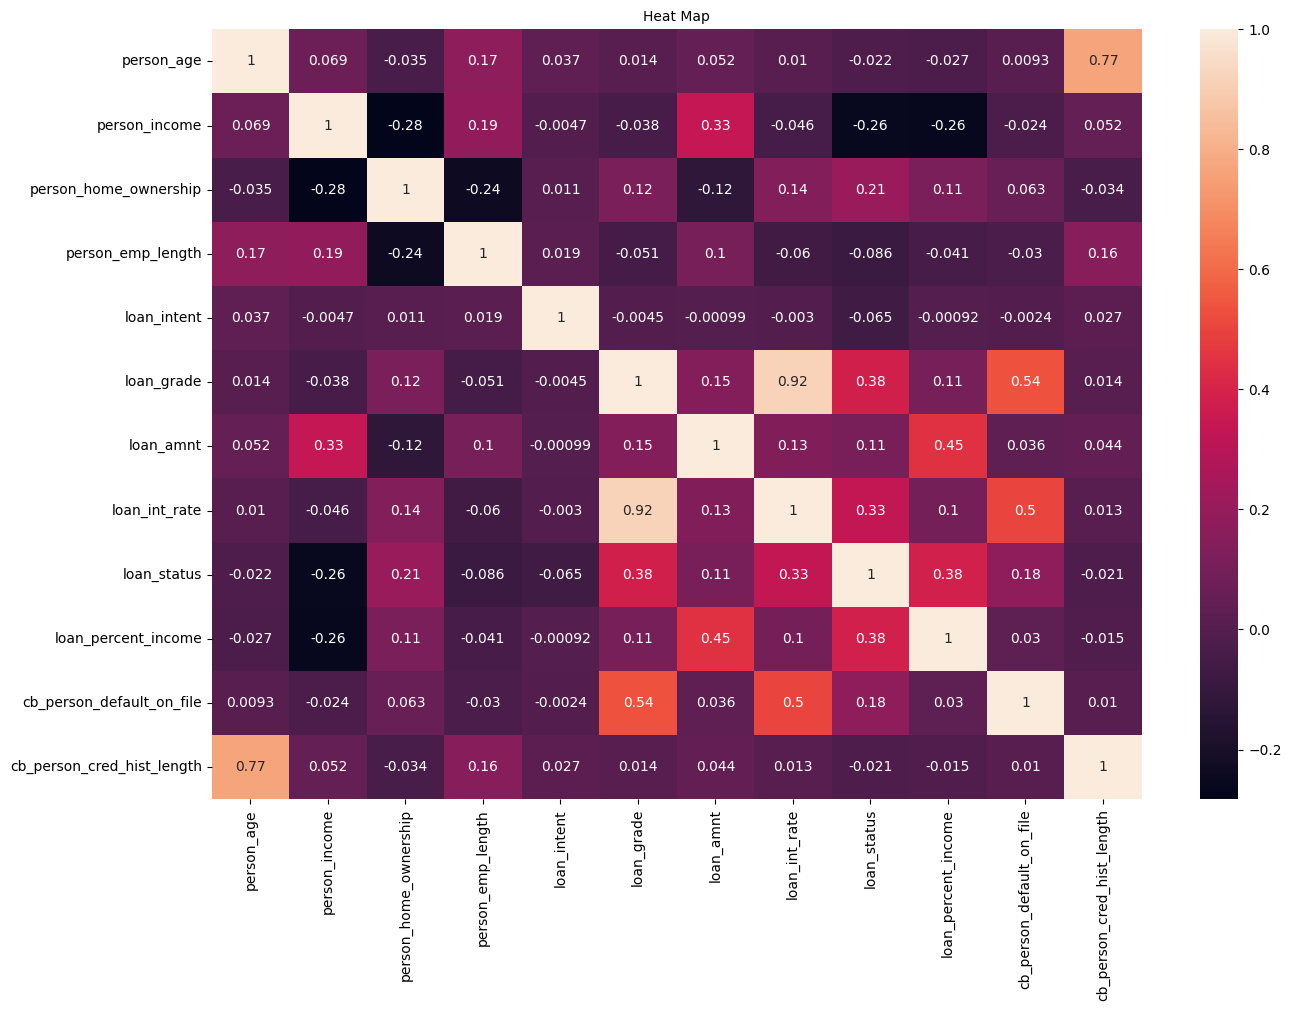

In [ ]:
plt.figure(figsize=(15,10))
# sns.heatmap(df.corr(),annot=True)
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title("Heat Map",size=10)
plt.yticks(rotation=0)
plt.show()

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,4.79,4,3,10000,16.02,1,0.17,1,3
1,21,9600,2,5.00,1,1,1000,11.14,0,0.17,0,2
2,25,9600,0,1.00,3,2,5500,12.87,1,0.17,0,3
3,23,65500,3,4.00,3,2,10000,15.23,1,0.17,0,2
4,24,54400,3,8.00,3,2,10000,14.27,1,0.17,1,4


**Splitting Data frame to X and Y Features**

In [ ]:
x=df.drop(['loan_status'],axis=1).values
y=df['loan_status'].values

In [ ]:
x

array([[2.2e+01, 5.9e+04, 3.0e+00, ..., 1.7e-01, 1.0e+00, 3.0e+00],
       [2.1e+01, 9.6e+03, 2.0e+00, ..., 1.7e-01, 0.0e+00, 2.0e+00],
       [2.5e+01, 9.6e+03, 0.0e+00, ..., 1.7e-01, 0.0e+00, 3.0e+00],
       ...,
       [6.5e+01, 7.6e+04, 3.0e+00, ..., 4.6e-01, 0.0e+00, 3.0e+00],
       [5.6e+01, 6.0e+04, 0.0e+00, ..., 1.7e-01, 0.0e+00, 3.0e+00],
       [6.6e+01, 4.2e+04, 3.0e+00, ..., 1.7e-01, 0.0e+00, 3.0e+00]])

In [ ]:
x.shape

(28638, 11)

In [ ]:
y

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
y.shape

(28638,)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

**Model Creation**

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# knn=KNeighborsClassifier(n_neighbors=5)
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

**Performance Evaluation**

In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.8901885474860335

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[4113,  330],
       [ 299,  986]])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

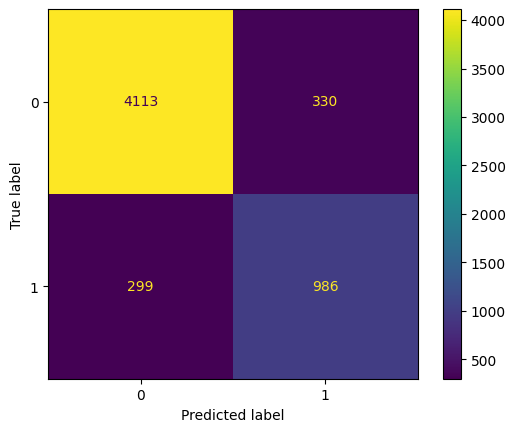

In [ ]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [ ]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4443
           1       0.75      0.77      0.76      1285

    accuracy                           0.89      5728
   macro avg       0.84      0.85      0.84      5728
weighted avg       0.89      0.89      0.89      5728

